### Import:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

### Data Loading:

In [2]:
df = pd.read_csv("data/WB_data.csv")

In [3]:
df.describe()

,1970 [YR1970],1980 [YR1980],1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
count,4.900000e+02,7.290000e+02,7.430000e+02,1.021000e+03,1.097000e+03,1.119000e+03,1.095000e+03,1.093000e+03,1.098000e+03,1.106000e+03,1.044000e+03,8.770000e+02,7.560000e+02,7.360000e+02,6.870000e+02
mean,3.651714e+08,7.161023e+08,1.268607e+09,1.379465e+09,2.886127e+09,2.813346e+09,3.103369e+09,3.172810e+09,2.761612e+09,2.746469e+09,3.123174e+09,3.858369e+09,4.539830e+09,4.475864e+09,5.296901e+09
std,3.692294e+09,7.210511e+09,1.151446e+10,1.612166e+10,2.758805e+10,2.608106e+10,3.198861e+10,3.276020e+10,2.778393e+10,2.785935e+10,3.107264e+10,3.460300e+10,3.888634e+10,3.876099e+10,4.443573e+10
min,1.458090e+00,9.376000e-01,1.040710e+00,1.012180e+00,8.503200e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.465560e+00,1.370930e+00,1.271740e-01,2.344510e-01,2.706617e-01,1.371000e+00,1.243000e+00
25%,1.859175e+04,8.502007e+01,8.969761e+01,8.688197e+01,8.684425e+01,8.109080e+01,8.573238e+01,8.771047e+01,8.678294e+01,8.904691e+01,8.816363e+01,7.714012e+01,6.396205e+00,6.633450e+00,5.952500e+00
50%,3.845662e+06,1.074800e+05,3.645630e+05,1.049430e+02,1.039126e+02,1.017608e+02,1.019326e+02,1.030195e+02,1.026582e+02,1.025575e+02,1.037060e+02,5.602300e+04,2.600147e+06,2.829142e+06,5.447247e+06
75%,4.132205e+07,2.451567e+07,4.520501e+07,2.138920e+07,2.480787e+07,2.284985e+07,2.656550e+07,2.746211e+07,2.741856e+07,2.571325e+07,3.583729e+07,1.092786e+08,2.613909e+08,2.640641e+08,3.757819e+08
max,8.009050e+10,1.793645e+11,2.597008e+11,4.686936e+11,8.004239e+11,7.507356e+11,9.623041e+11,9.833163e+11,8.237758e+11,8.306787e+11,9.032919e+11,9.140807e+11,9.645020e+11,9.515541e+11,1.046599e+12


In [4]:
df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1970 [YR1970]', '1980 [YR1980]', '1990 [YR1990]', '2000 [YR2000]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    1596 non-null   object 
 1   Series Code    1596 non-null   object 
 2   Country Name   1596 non-null   object 
 3   Country Code   1596 non-null   object 
 4   1970 [YR1970]  490 non-null    float64
 5   1980 [YR1980]  729 non-null    float64
 6   1990 [YR1990]  743 non-null    float64
 7   2000 [YR2000]  1021 non-null   float64
 8   2011 [YR2011]  1097 non-null   float64
 9   2012 [YR2012]  1119 non-null   float64
 10  2013 [YR2013]  1095 non-null   float64
 11  2014 [YR2014]  1093 non-null   float64
 12  2015 [YR2015]  1098 non-null   float64
 13  2016 [YR2016]  1106 non-null   float64
 14  2017 [YR2017]  1044 non-null   float64
 15  2018 [YR2018]  877 non-null    float64
 16  2019 [YR2019]  756 non-null    float64
 17  2020 [YR2020]  736 non-null    float64
 18  2021 [YR

### Data wrangling:

In [6]:
#Creation of a header dictionary, to rename the years columns.
header_dict = {k: int(k[:4]) for k in df.columns.to_list()[4:]}
df = df.rename(header_dict, axis=1)

In [7]:
# Show the renamed columns
df.columns

Index([ 'Series Name',  'Series Code', 'Country Name', 'Country Code',
                 1970,           1980,           1990,           2000,
                 2011,           2012,           2013,           2014,
                 2015,           2016,           2017,           2018,
                 2019,           2020,           2021],
      dtype='object')

In [8]:
# Bring data into a coherent long format
df_t=df.melt(id_vars=df.columns.to_list()[:4])
df_t

,Series Name,Series Code,Country Name,Country Code,variable,value
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,1970,10752971.0
1,"Population, total",SP.POP.TOTL,Albania,ALB,1970,2135479.0
2,"Population, total",SP.POP.TOTL,Algeria,DZA,1970,13795915.0
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,1970,27075.0
4,"Population, total",SP.POP.TOTL,Andorra,AND,1970,19860.0
...,...,...,...,...,...,...
23935,Gross intake ratio in first grade of primary e...,SE.PRM.GINT.ZS,Sub-Saharan Africa,SSF,2021,NaN
23936,Gross intake ratio in first grade of primary e...,SE.PRM.GINT.ZS,Sub-Saharan Africa (excluding high income),SSA,2021,NaN
23937,Gross intake ratio in first grade of primary e...,SE.PRM.GINT.ZS,Sub-Saharan Africa (IDA & IBRD countries),TSS,2021,NaN
23938,Gross intake ratio in first grade of primary e...,SE.PRM.GINT.ZS,Upper middle income,UMC,2021,NaN


In [9]:
# Get data into a usable wide format
df_t1=df_t.pivot(columns="Series Name", index=["Country Code", "variable"], values="value").reset_index()
df_t1

Series Name,Country Code,variable,Adjusted savings: education expenditure (current US$),"Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
0,ABW,1970,NaN,NaN,NaN,NaN,59106.0,NaN
1,ABW,1980,NaN,NaN,NaN,NaN,62267.0,NaN
2,ABW,1990,3.591697e+07,NaN,NaN,NaN,65712.0,NaN
3,ABW,2000,7.572675e+07,4.71536,106.07735,95.905182,89101.0,NaN
4,ABW,2011,1.380158e+08,5.91438,NaN,NaN,101288.0,NaN
...,...,...,...,...,...,...,...,...
3985,ZWE,2017,2.978407e+08,5.81878,NaN,90.340347,14751101.0,NaN
3986,ZWE,2018,6.387594e+08,2.05049,NaN,92.572067,15052184.0,NaN
3987,ZWE,2019,4.104177e+08,NaN,NaN,92.934624,15354608.0,NaN
3988,ZWE,2020,4.017035e+08,NaN,NaN,NaN,15669666.0,NaN


### Excluding Regional grouped data from df_t1

In [10]:
# Get the unique regional values (start from row 2017)
excl_list=list(df[df["Series Code"] == "SP.POP.TOTL"][217:]["Country Code"])
# Exclude the identified regional groups
df_t1=df_t1[~df_t1["Country Code"].isin(excl_list)]

## Ploting

In [48]:
# Prepare data for plotting
df_plot = df_t1.copy().T
# Set country codes as column headers
df_plot.columns = df_plot.iloc[0]
# Drop row of country codes
df_plot = df_plot.drop(["Country Code","variable"])

### Missing values

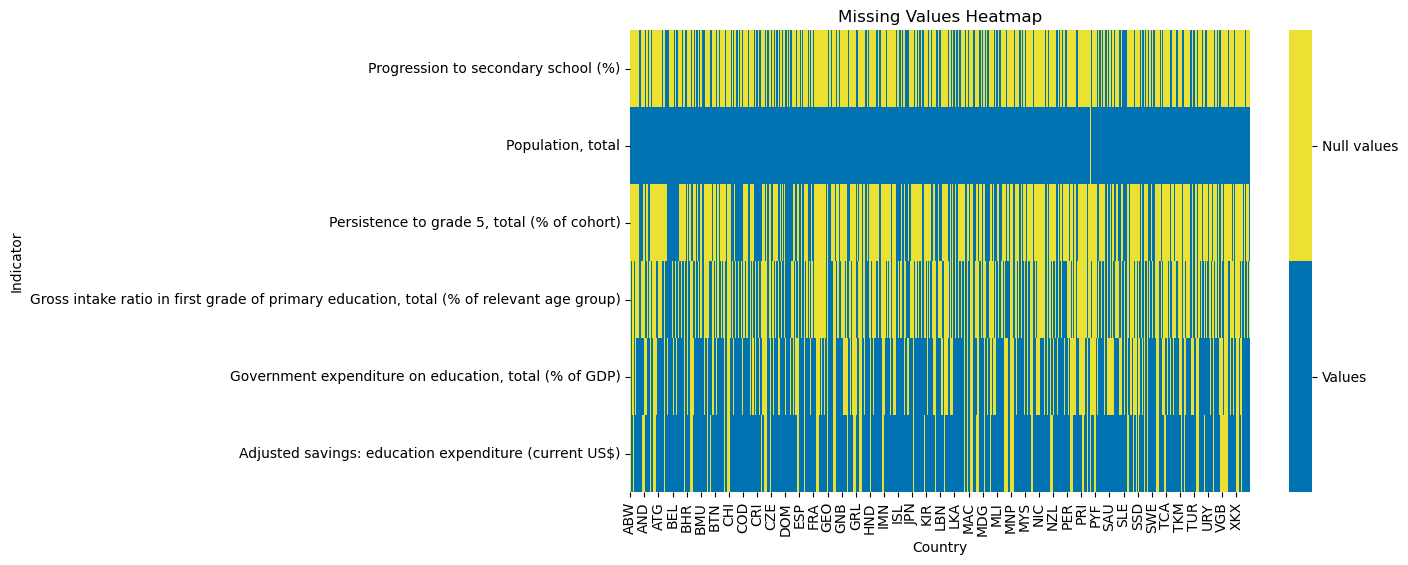

In [64]:
# Plot the actual figure
plt.figure(figsize=(10, 6))
# Generate a color map for binary classification (True vs False)
colors = (sns.color_palette("colorblind")[0], sns.color_palette("colorblind")[8])
cmap = LinearSegmentedColormap.from_list("Binary", colors, len(colors))
ax = sns.heatmap(df_plot.isnull(), cmap=cmap)
plt.title('Missing Values Heatmap')

# Manually changing the colorbar after it's generation
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Values', 'Null values'])

# X - Y axis labels
ax.set_ylabel('Indicator')
ax.set_xlabel('Country')
ax.invert_yaxis()

plt.show()

In [88]:
# Count NAs across dataframe
df_t1.isna().sum()

Series Name
Country Code                                                                                  0
variable                                                                                      0
Adjusted savings: education expenditure (current US$)                                       596
Government expenditure on education, total (% of GDP)                                      1219
Gross intake ratio in first grade of primary education, total (% of relevant age group)    1849
Persistence to grade 5, total (% of cohort)                                                2125
Population, total                                                                             2
Progression to secondary school (%)                                                        2320
dtype: int64

In [107]:
# Show NULLs by year
nulls = df_t1.copy()
nulls = nulls.set_index("variable").iloc[:,1:].isnull()
nulls.groupby(["variable"]).sum()


Series Name,Adjusted savings: education expenditure (current US$),"Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
variable,,,,,,
1970,104,188,202,200,1,208
1980,85,155,139,151,1,164
1990,61,168,140,160,0,176
2000,33,98,79,138,0,117
2011,27,67,71,123,0,104
2012,28,56,68,115,0,103
2013,27,56,72,130,0,107
2014,26,52,71,137,0,106
2015,27,49,73,134,0,110


### Correlations

In [76]:
# Calculate an actual correlation matrix
corr = df_t1.iloc[:,2:].corr()
# Plot with pandas inbuilt plotting function
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

Series Name,Adjusted savings: education expenditure (current US$),"Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
Series Name,,,,,,
Adjusted savings: education expenditure (current US$),1.00,0.07,-0.02,0.08,0.34,0.14
"Government expenditure on education, total (% of GDP)",0.07,1.00,-0.08,0.31,-0.06,0.22
"Gross intake ratio in first grade of primary education, total (% of relevant age group)",-0.02,-0.08,1.00,-0.33,0.02,0.00
"Persistence to grade 5, total (% of cohort)",0.08,0.31,-0.33,1.00,0.02,0.52
"Population, total",0.34,-0.06,0.02,0.02,1.00,-0.01
Progression to secondary school (%),0.14,0.22,0.00,0.52,-0.01,1.00


##### Correlation without NULLs

In [108]:
# Calculate an actual correlation matrix
df_t2 = df_t1[(df_t1["variable"] >= 2000) & (df_t1["variable"] <= 2017)]
corr = df_t2.dropna().iloc[:,2:].corr()
# Plot with pandas inbuilt plotting function
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

Series Name,Adjusted savings: education expenditure (current US$),"Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
Series Name,,,,,,
Adjusted savings: education expenditure (current US$),1.00,0.12,-0.15,0.26,0.38,0.27
"Government expenditure on education, total (% of GDP)",0.12,1.00,-0.12,0.31,-0.07,0.28
"Gross intake ratio in first grade of primary education, total (% of relevant age group)",-0.15,-0.12,1.00,-0.57,-0.01,-0.32
"Persistence to grade 5, total (% of cohort)",0.26,0.31,-0.57,1.00,-0.03,0.60
"Population, total",0.38,-0.07,-0.01,-0.03,1.00,-0.01
Progression to secondary school (%),0.27,0.28,-0.32,0.60,-0.01,1.00


## Alternative to get WB data

In [116]:
import wbgapi as wb


In [117]:
df_wb = wb.data.DataFrame(series=['SP.POP.TOTL', 'NY.ADJ.AEDU.CD', 'SE.XPD.TOTL.GD.ZS','SE.SEC.PROG.ZS', 'SE.PRM.PRS5.ZS', 'SE.PRM.GINT.ZS', "NY.GDP.MKTP.CD"], time=range(1990, 2021))

In [109]:
df["Series Code"].unique()

array(['SP.POP.TOTL', 'NY.ADJ.AEDU.CD', 'SE.XPD.TOTL.GD.ZS',
       'SE.SEC.PROG.ZS', 'SE.PRM.PRS5.ZS', 'SE.PRM.GINT.ZS'], dtype=object)